
🔍 Silhouette Score: 0.519


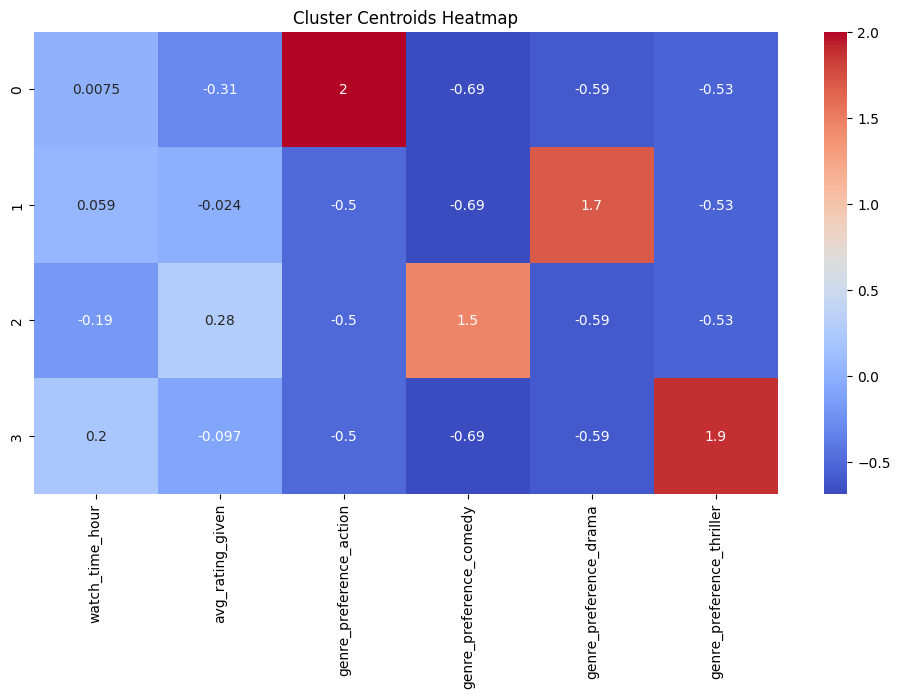

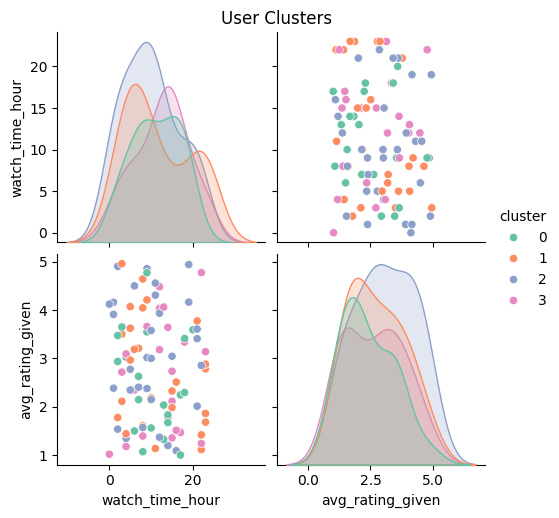

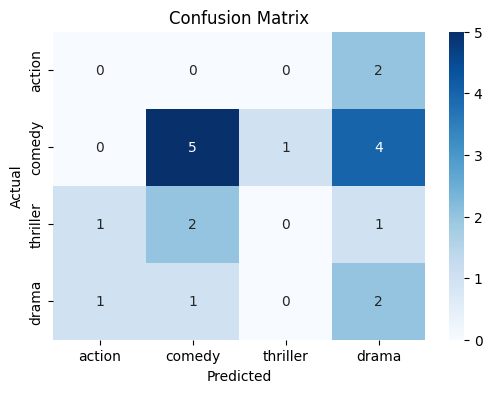


📊 Classification Report:
              precision    recall  f1-score   support

      action       0.00      0.00      0.00         2
      comedy       0.62      0.50      0.56        10
    thriller       0.00      0.00      0.00         4
       drama       0.22      0.50      0.31         4

    accuracy                           0.35        20
   macro avg       0.21      0.25      0.22        20
weighted avg       0.36      0.35      0.34        20



In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


path = "/content/movie_watch (1).csv"
df = pd.read_csv(path)


df_cluster = pd.get_dummies(df, columns=['genre_preference'])


features_cluster = ['watch_time_hour', 'avg_rating_given'] + \
                   [col for col in df_cluster.columns if 'genre_preference_' in col]
X_cluster = df_cluster[features_cluster]



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


# KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


# Silhouette Score
score = silhouette_score(X_scaled, df['cluster'])
print(f"\n🔍 Silhouette Score: {score:.3f}")


# Cluster Centroid Heatmap
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=features_cluster)
plt.figure(figsize=(12, 6))
sns.heatmap(centroids, annot=True, cmap="coolwarm")
plt.title("Cluster Centroids Heatmap")
plt.show()


# Pairplot of clusters
sns.pairplot(df, vars=['watch_time_hour', 'avg_rating_given'], hue='cluster', palette='Set2')
plt.suptitle("User Clusters", y=1.02)
plt.show()



# Step 4: --- Classification Section ---

# Encode 'genre_preference' as label
df_class = df.copy()
label_map = {label: idx for idx, label in enumerate(df_class['genre_preference'].unique())}
df_class['genre_label'] = df_class['genre_preference'].map(label_map)



# Features and labels
X = df_class[['watch_time_hour', 'avg_rating_given']]
y = df_class['genre_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


# Predictions
y_pred = model.predict(X_test)



# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_map.keys()))
